### Load libraries

In [1]:
import numpy as np                                       #NumPy
from os import listdir                                   #List items in directory
from Bio.Align import PairwiseAligner                    #Used to align sequences (my 123A implementation is too slow)
import matplotlib.pyplot as plt                          #Data visualization (for the phylogenetic tree)
from scipy.cluster.hierarchy import dendrogram           #Plot a dendrogram/phylogenetic tree
from scipy.cluster.hierarchy import linkage              #Clustering required to by dendrogram
from matplotlib.pyplot import figure                     #Used to adjust the figure size
from Bio import AlignIO                                  #Used to import an aligned fasta file

### Create a FASTA node

In [2]:
class FASTA():
    def __init__(self, name, sequence, animal):
        self.name = name
        self.sequence = sequence
        self.animal = animal

### Load FASTA files while also combining the data into 1 file

#### Soy Leghemoglobin Data

In [3]:
leg_data = []    # Basic data set
combined = open("Alignment\leg_data_unaligned.fasta", "w")

for filename in listdir("Raw Data\Soy Leghemoglobin"):
    file = open("Raw Data\Soy Leghemoglobin\\"+filename, "r")
    name = file.readline()[1:]
    combined.write(">"+name)
    
    sequence = ""
    for line in file.read().split("\n"):
        if not line == "":
            sequence += line
    combined.write(sequence+"\n\n")
    
    leg_data.append(FASTA(name, sequence, "Soy"))
    
    file.close()
combined.close()

#### Various Myoglobin Data

In [4]:
myo_data = []
combined = open("Alignment\myo_data_unaligned.fasta", "w")

for filename in listdir("Raw Data\Various Myoglobin"):
    file = open("Raw Data\Various Myoglobin\\"+filename, "r")
    name = file.readline()[1:]
    combined.write(">"+name)
    
    sequence = ""
    for line in file.read().split("\n"):
        if not line == "":
            sequence += line
    combined.write(sequence+"\n\n")
    
    myo_data.append(FASTA(name, sequence, filename[:filename.index(" ")]))
    
    file.close()
combined.close()

### Build a Phylogenetic Tree using a Distance Matrix

In [5]:
def build_tree(data, labels):
    # Create a distance matrix from the sequences
    dists = []
    for i in range(len(data)-1):
        dists_i = []
        for j in range(i+1, len(data)):
            alignment = PairwiseAligner().align(data[i].sequence,data[j].sequence)
            dists_i.append(alignment.score)
        dists.append(dists_i)
    # Fill repetitive half of distance matrix
    dists.append([])
    dists = np.flip(dists).tolist()
    for i in range(int((len(dists)+1)/2)):
        dist_save = dists[i]
        dists[i] = dists[i] + [0] + np.flip(dists[len(dists)-i-1]).tolist()
        if i!=len(dists)-i-1:
            dists[len(dists)-i-1] = dists[len(dists)-i-1] + [0] + np.flip(dist_save).tolist()
    # Build tree    
    linkage_matrix = linkage(dists)
    dendrogram(linkage_matrix, labels=labels, orientation="right")
    plt.show()

#### Leghemoglobin data set

C:\Users\truon\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


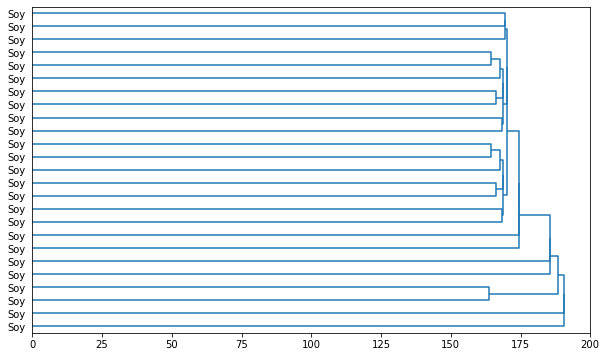

In [6]:
leg_labels = ["Soy"]*len(leg_data)
figure(figsize=(10,6))
build_tree(leg_data, leg_labels)
#Very large numbers, hence they are super similar

#### Myoglobin data set

##### Gather animals for figure label

In [7]:
myo_labels = []
for entry in myo_data:
    myo_labels.append(entry.animal)

##### Plot figure

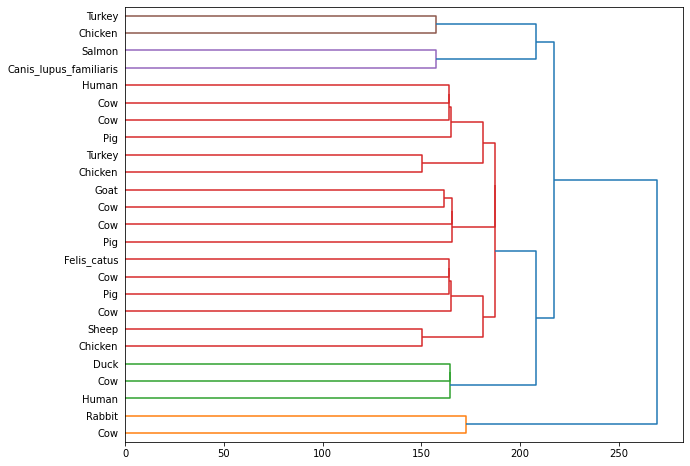

In [8]:
figure(figsize=(10,8))
build_tree(myo_data, myo_labels)    
# No correlation, hence their isn't really a difference

#### Combination of both sets

##### Combine data

In [9]:
all_data = myo_data + leg_data

##### Remove outliers (Comment to view original results)

In [10]:
all_data = np.delete(all_data, [4,45]).tolist()

##### Gather animals for figure label

In [11]:
all_labels = []
for entry in all_data:
    all_labels.append(entry.animal)

##### Plot figure

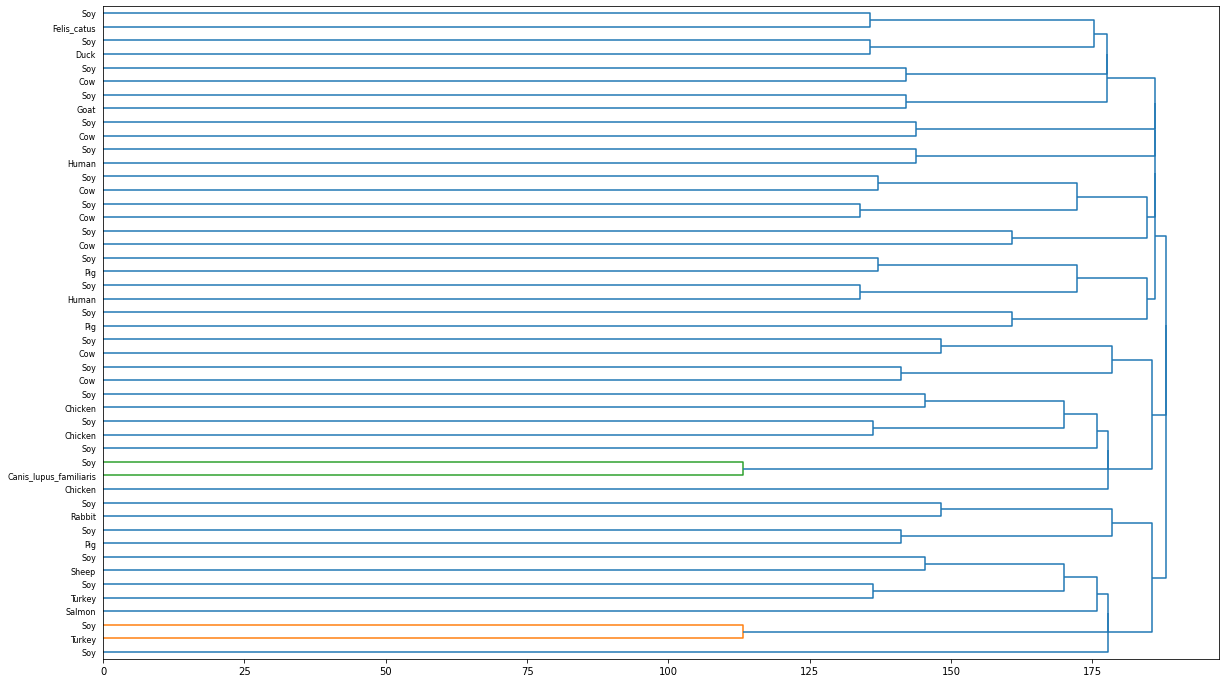

In [12]:
figure(figsize=(20,12))
build_tree(all_data, all_labels)    
#Generally random/low differences; roughly every soy's closest neighbor is non-soy

### *Align each combined file extrenally (ClustalOmega: https://www.ebi.ac.uk/Tools/msa/clustalo/)

##### Align X_data_unaligned.fasta and save results onto X_data_aligned.clustal

##### Create a combination both of files

In [13]:
file = open("Alignment\combined_data_unaligned.fasta", "w")
leg = open("Alignment\leg_data_unaligned.fasta", "r")
myo = open("Alignment\myo_data_unaligned.fasta", "r")

file.write(leg.read())
file.write(myo.read())

leg.close()
myo.close()
file.close()

### Import extrenal alignment of sequences (should be included with project)

#### Leghemoglobin data

In [14]:
leg_data_aligned = AlignIO.read(open("Alignment\leg_data_aligned.clustal"), "clustal")
for entry in leg_data_aligned:
    print(entry.seq+" |(Soy)"+entry.id) 
# Very clean alignment (low indels), with the exception of the first 2 insertions

MGAFTEKQEALVNSSFEAFKANLPHHSVVFFNSILEKAPAAKNMFSFLGDAVDPKNPKLAGHAEKLFGLVRDSAVQLQTKGLVVADATLGPIHTQKGVTDLQFAVVKEALLKTIKEAVGDKWSEELSNPWEVAYDEIAAAIKKAMAIGSLV |(Soy)V00451.1
MGAFTEKQEALVNSSFEAFKANLPHHSVVFFNSILEKAPAAKNMFSFLGDAVDPKNPKLAGHAEKLFGLVRDSAVQLQTKGLVVADATLGPIHTQKGVTDLQFAVVKEALLKTIKEAVGDKWSEELSNAWEVAYDEIAAAIKKAMAIGSLV |(Soy)KHN37872.1
-GAFTEKQDALVSSSFEAFKANIPQYSVVFYNSILEKAPAAKDLFSFLANGVDPTNPKLTGHAEKLFALVRDSAGQLKASGTVVADAALGSIHAQKAVTNPEFV-VKEALLKTIKEAVGDKWSDELSSAWEVAYDELAAAIKKAF------ |(Soy)pir||GPSYC2
-VAFTEKQDALVSSSFEAFKANIPQYSVVFYTSILEKAPAAKDLFSFLANGVDPTNPKLTGHAEKLFALVRDSAGQLKASGTVVADAALGSVHAQKAVTDPQFVVVKEALLKTIKAAVGDKWSDELSRAWEVAYDELAAAIKKA------- |(Soy)pdb|1FSL|A
-VAFTEKQDALVSSSFEAFKANIPQYSVVFYTSILEKAPAAKDLFSFLANGVDPTNPKLTGHAEKLFALVRDSAGQLKASGTVVADAALGSVHAQKAVTDPQFVVVKEALLKTIKAAVGDKWSDELSRAWEVAYDELAAAIKKA------- |(Soy)pdb|1FSL|B
MVAFTEKQDALVSSSFEAFKANIPQYSVVFYTSILEKAPAAKDLFSFLANGVDPTNPKLTGHAEKLFALVRDSAGQLKASGTVVADAALGSVHAQKAVTDPQFVVVKEALLKTIKAAVGDKWSDELSRAWEVAYDELAAAIKKA------- |(So

#### Myoglobin data

In [15]:
myo_data_aligned = AlignIO.read(open("Alignment\myo_data_aligned.clustal"), "clustal") # This one shows there ARE differences
for entry in myo_data_aligned:
    for fasta in myo_data:
        if fasta.name.split(" ")[0] == entry.id:
            print(entry.seq+" |"+fasta.animal)
            break   
# Very clean alignment (mostly mismatches, less indels)

MVLSAADKGNVKAAWGKVGGHAAEYGAEALERMFLSFPTTKTYFPHFDL------SHGSAQVKGHGAKVAAALTKAVEHLDDLPGALSELSDLHAHKLRVDPVNFKLLSHSLLVTLASHLPSDFTPAVHASLDKFLANVSTVLTSKYR------ |Cow
----MANYDMVLQCWEPVEADYNNHGGLVLSRLFAEHPETLTLFPKFAGIAAG-DLSGNAAVAAHGATVLRKLGELLNARGDHAATLKSLATTHANKHKIPLKNFTLITNIICKVMGEKAGL--DEAGQEALRQVMGVIIADINVTYMELGFAG |Salmon
MGLSDQEWQQVLTIWGKVEADIAGHGHEVLMRLFHDHPETLDRFDKFKGLKTPDQMKGSEDLKKHGATVLTQLGKILKQKGNHESELKPLAQTHATKHKIPVKYLEFISEVIIKVIAEKHAADFGADSQAAMKKALELFRNDMASKYKEFGFQG |Chicken
MGLSDQEWQQVLTIWGKVEADIAGHGHEVLMRLFHDHPETLDRFDKFKGLKTPDQMKGSEDLKKHGATVLTQLGKILKQKGNHESELKPLAQTHATKHKIPVKYLEFISEVIIKVIAEKHAADFGADSQAAMKKALELFRNDMASKYKEFGFQG |Chicken
MGLSDQEWQQVLTIWGKVEADIAGHGHEVLMRLFHDHPETLDRFDKFKGLKTPDQMKGSEDLKKHGATVLTQLGKILKQKGNHESELKPLAQTHATKHKIPVKYLEFISEVIIKVIAEKHAADFGADSQAAMKKALELFRNDMASKYKEFGFQG |Chicken
MGLSDQEWQQVLTIWGKVEADIAGHGHEVLMRLFHDHPETLDRFDKFKGLKTPDQMKGSEDLKKHGATVLTQLGKILKQKGNHESELKPLAQTHATKHKIPVKYLEFISEVIIKVIAEKHAADFGADSQAAMKKALELFRNDMASKYKEFGFQG |Turkey
MGLSDQEWQQVLTIWGKVEADI

#### All data

In [16]:
combined_data_aligned = AlignIO.read(open("Alignment\combined_data_aligned.clustal"), "clustal") # Same analysis as Tree
i=0
for entry in combined_data_aligned:
    is_leg = True
    for fasta in myo_data:
        if fasta.name.split(" ")[0] == entry.id:
            print(entry.seq+" |"+fasta.animal)
            is_leg = False
            i+=1
            break
    if is_leg:
        print(entry.seq+" |(Soy)"+entry.id)    
# There is a very noticable segregation between leghemoglobin and hemoglobin

MGAFTEKQEALVNSSFEAFKANLPHHSVVFFNSILEKAPAAKNMFSFLGDAVDP----KNPKLAGHAEKLFGLVRDSAVQLQTKGLVVA-DATLGPIHTQKGV-TDLQFAVVKEALLKTIKEAVGDKWSEELSNPWE----VAYDEIAAAIKKAMAIGSLV |(Soy)V00451.1
MGAFTEKQEALVNSSFEAFKANLPHHSVVFFNSILEKAPAAKNMFSFLGDAVDP----KNPKLAGHAEKLFGLVRDSAVQLQTKGLVVA-DATLGPIHTQKGV-TDLQFAVVKEALLKTIKEAVGDKWSEELSNAWE----VAYDEIAAAIKKAMAIGSLV |(Soy)KHN37872.1
-GAFTEKQDALVSSSFEAFKANIPQYSVVFYNSILEKAPAAKDLFSFLANGVDP----TNPKLTGHAEKLFALVRDSAGQLKASGTVVA-DAALGSIHAQKAV-TNPEFV-VKEALLKTIKEAVGDKWSDELSSAWE----VAYDELAAAIKKAF------ |(Soy)pir||GPSYC2
-VAFTEKQDALVSSSFEAFKANIPQYSVVFYTSILEKAPAAKDLFSFLANGVDP----TNPKLTGHAEKLFALVRDSAGQLKASGTVVA-DAALGSVHAQKAV-TDPQFVVVKEALLKTIKAAVGDKWSDELSRAWE----VAYDELAAAIKKA------- |(Soy)pdb|1FSL|A
-VAFTEKQDALVSSSFEAFKANIPQYSVVFYTSILEKAPAAKDLFSFLANGVDP----TNPKLTGHAEKLFALVRDSAGQLKASGTVVA-DAALGSVHAQKAV-TDPQFVVVKEALLKTIKAAVGDKWSDELSRAWE----VAYDELAAAIKKA------- |(Soy)pdb|1FSL|B
MVAFTEKQDALVSSSFEAFKANIPQYSVVFYTSILEKAPAAKDLFSFLANGVDP----TNPKLTGHAEKLFALVRDSAGQLKASGTVVA-DAALGSVHAQKAV-TD

### Split data 80/20

#### Leghemoglobin data

In [17]:
leg_seqs = []
for entry in leg_data_aligned:
    leg_seqs.append(str(entry.seq))

leg_train = leg_seqs[:int(0.8*len(leg_seqs))]
leg_test = leg_seqs[int(0.8*len(leg_seqs)):]

#Unalign test set (luckily all the deletes are at the end)
for i, test in enumerate(leg_test):
    leg_test[i] = test[:test.index('-')]

#### Myoglobin data (Hand pick test values)

In [18]:
myo_seqs = []
for entry in myo_data_aligned:
    myo_seqs.append(str(entry.seq))

selection = [5, 15, 2, 18, 24] # Cow, human, chicken, pig, turkey
myo_train = np.delete(myo_seqs, selection).tolist()
myo_test = np.array(myo_data)[selection]
myo_test_labels = ["Cow", "Human", "Chicken", "Pig", "Turkey"]

#Extract sequences out of FASTA node
for i, test in enumerate(myo_test):
    myo_test[i] = test.sequence

#### Myoglobin data (Hand pick only cow test sequences)

In [19]:
cow_selection = range(4,12)
cow_test = []
for i in cow_selection:
    cow_test.append(myo_data[i].sequence)

cow_selection = [0, 10, 11, 12, 13, 14, 15, 16]
cow_aligned = np.array(myo_seqs)[cow_selection]

### HMM from scratch

#### Initialize final variables

In [20]:
E = 0.01
ins_E = 0.01
num_proteins = 20

#### Base State

In [21]:
class Base_State(object):
    def __init__(self):
        self.next = {} #{"name":(probability, node_object)}

#### Normal State

In [22]:
class State(Base_State):
    def __init__(self):
        super().__init__()
        self.attributes = {
            "F": E, "L": E, "I": E, "M": E,
            "V": E, "A": E, "T": E, "P": E,
            "S": E, "D": E, "E": E, "N": E,
            "K": E, "Q": E, "H": E, "Y": E,
            "C": E, "W": E, "R": E, "G": E
        }

#### Insert State

In [23]:
class InsertState(Base_State):
    def __init__(self):
        super().__init__()
        self.next["insert"] = (ins_E, self)

#### Delete State

In [24]:
class DeleteState(Base_State):
    def __init__(self):
        super().__init__()

#### HMM Class

In [25]:
class HMM:
    def __init__(self):
        self.root = State()
        self.stop = State()
        
# Train the model
    def fit(self, data):
        curr_state = self.root
        curr_del_state = None
        for i in range(len(data[0])):
            # Get all the chars in the column
            aas = {}
            for seq in data:
                if seq[i] in aas.keys():
                    aas[seq[i]] += 1
                else:
                    aas[seq[i]] = 1
            
            # Calculate the remaining probability to distribute among Normal State's Attributes
            att_prob = 1
            not_included = num_proteins - len(aas.keys())    #Count # of aa not included in column
            has_gap = 0
            if '-' in aas.keys():                            #Gap is NOT an aa
                not_included += 1
                has_gap = aas['-']
            att_prob -= not_included*E                       #aa not included error taken out
            att_prob /= (len(data)-has_gap)                  #Divide among each # of sequences
            
            # Create states
            next_state = State()
            next_state_prob = 1 - ins_E      #Probability of reaching the normal state
            next_delete = None
            has_delete = False
            for aa in aas:
                if not aa == '-':
                    next_state.attributes[aa] = att_prob*aas[aa]    #Db: calculated correctly
                else:
                    next_delete = DeleteState()
                    curr_state.next["delete"] = (1/len(data)*aas[aa], next_delete)    # Add del_state to curr_state.next
                    next_state_prob -= 1/len(data)*aas[aa]                        # Update probability of reaching the normal state {Db: calculated correctly}
                    if curr_del_state is not None:                                # Link nodes onto delete state and update curr_del_state
                        curr_del_state.next["delete"] = (1/len(data)*aas[aa], next_delete)
                        curr_del_state.next["normal"] = (next_state_prob+ins_E, next_state)
                    curr_del_state = next_delete
                    has_delete = True
            curr_state.next["normal"] = (next_state_prob, next_state)
            
            # If state no delete state was created with an active delete state, 
            # update curr_del_state to None and link to new state.
            if not has_delete and curr_del_state is not None:    
                curr_del_state.next["normal"] = (next_state_prob+ins_E, next_state)
                curr_del_state = None

            #Add insert state
            ins_state = InsertState()
            ins_state.next["normal"] = (1-ins_E, next_state)
            curr_state.next["insert"] = (ins_E, ins_state)        
            
            #Iterate to next state
            curr_state = next_state
            
        # Link to stop node (no need to range(-1) in loop)
        ins_state = InsertState()
        ins_state.next["normal"] = (1-ins_E, self.stop)
        
        curr_state.next["insert"] = (ins_E, ins_state)
        curr_state.next["normal"] = (1-ins_E, self.stop)
        
        if curr_del_state is not None:
            curr_del_state.next["normal"] = (1, self.stop)
        
# Get the Viterbi Score        
    def predict(self, sequence):
        # Initialize the table with initial probability (Rows: normal = 0, insert = 1, delete = 2)
        table = []
        for i in range(3):
            table.append([1/3])
        
        delete = False
        # Initialize states
        states = [None,None,None]     #Again: normal = 0, insert = 1, delete = 2)
        states[0] = self.root  #Normal
        states[1] = states[0].next["insert"][1]
        states[2] = None
        if "delete" in states[0].next.keys():
            states[2] = states[0].next["delete"][1]
            delete = True
            
        # Fill table
        reached_end = False
        for x in range(len(sequence)):
            next_state = None
            
            # If reached end of linked list and insertion is needed
            if reached_end:
                table[0].append(table[0][x] * ins_E)
                table[1].append(table[0][x] * ins_E)
                table[2].append(table[0][x] * ins_E)   # Not possible, but we need some value
            else:
                next_state = states[0].next["normal"][1]
                
                # Calculate value for the normal state row
                temp = []
                for i in range(3):
                    if i == 2 and (delete or states[i] == None):   # In case delete state [2] is blank
                        break
                    temp.append(table[i][x] * states[i].next["normal"][0] * next_state.attributes[sequence[x]])
                normal_value = max(temp)
                table[0].append(normal_value)

                # Calculate value for the insert state row
                temp = []
                for i in range(2):   # An insert in a delete (delete->insert) is not possible: would just be a mismatch
                    temp.append(table[i][x] * states[i].next["insert"][0])
                insert_value = max(temp)
                table[1].append(insert_value)

                # Calculate value for the delete state row
                # Also: A delete in an insert (insert->delete) is not possible: would just be a mismatch
                temp = []
                delete_value = table[0][x] * ins_E     # Psuedo-delete state if delete state doesn't exist: max(table[0][x]*ins_E, -99, -99)
                if "delete" in states[0].next:    # If delete state exists
                    temp.append(table[0][x] * states[0].next["delete"][0])
                    
                    if not states[2] == None and "delete" in states[2].next.keys() and not delete:
                        temp.append(table[2][x] * states[2].next["delete"][0])
                    else:
                        temp.append(table[2][x] * ins_E) # Psuedo-delete state
                    delete_value = max(temp)
                table[2].append(delete_value)

            #Iterate nodes
            if reached_end or len(next_state.next) == 0:    # Sequence is longer than training sequences and require insertion
                reached_end = True
            else:
                # Handle delete state. If there is a delete, has to skip an iteration before processing (hence the 'delete' boolean)
                if "delete" in next_state.next.keys():
                    states[2] = next_state.next["delete"][1]
                    delete = True
                else:
                    if delete:
                        delete = False
                    else:
                        states[2] = None
                #Iterate nornal state
                if isinstance(next_state, DeleteState):
                    states[1] = None
                else:
                    states[1] = next_state.next["insert"][1]
                states[0] = next_state
                
        # Get Viterbi score
        score = max(
            table[0][-1],
            table[1][-1],
            table[2][-1]
        )
        
        return score

### Train Model and Test

In [26]:
leg_hmm = HMM()
leg_hmm.fit(leg_train)

myo_hmm = HMM()
myo_hmm.fit(myo_train)

#### Test Leghemoglobin HMM

In [27]:
for test in leg_test:
    score = leg_hmm.predict(test)
    print("Soy\t"+str(score))
# Base scores to sompare with below

Soy	5.30033873848049e-20
Soy	5.614113567991492e-29
Soy	7.457788463719895e-27
Soy	4.101783655045943e-27
Soy	4.101783655045943e-27


#### Test Myohemoglobin HMM

In [28]:
for test, label in zip(myo_test, myo_test_labels):
    score = myo_hmm.predict(test)
    print(label+"\t"+str(score))
# Base scores to sompare with below

Cow	5.746529244269801e-29
Human	2.404579744105982e-35
Chicken	7.613327645334508e-43
Pig	4.477347112747736e-31
Turkey	7.613327645334508e-43


#### Use Leghemoglobin test set on Myohemoglobin HMM

In [29]:
for test in leg_test:
    score = myo_hmm.predict(test)
    print("Soy\t"+str(score))
# Bad scores

Soy	4.4437712440684957e-262
Soy	6.7600268408003205e-264
Soy	6.76002684080032e-262
Soy	6.7600268408003205e-264
Soy	6.7600268408003205e-264


#### Use Myohemoglobin test set on Leghemoglobin HMM

In [30]:
for test, label in zip(myo_test, myo_test_labels):
    score = leg_hmm.predict(test)
    print(label+"\t"+str(score))
# Bad scores

Cow	2.829675374206272e-281
Human	2.829675374206272e-281
Chicken	2.187259222762203e-283
Pig	2.2971304687806525e-280
Turkey	2.187259222762203e-283


### Extra analysis: Cow Myohemoglobin test (359 lines of code up to here)

#### Use Cow only Myohemoglobin test set on Leghemoglobin HMM

In [31]:
for test in cow_test:
    score = leg_hmm.predict(test)
    print("Cow\t"+str(score))
# Bad scores

Cow	5.929022975528739e-267
Cow	2.829675374206272e-281
Cow	2.829675374206272e-281
Cow	2.829675374206272e-281
Cow	2.829675374206272e-281
Cow	2.829675374206272e-281
Cow	2.829675374206272e-281
Cow	2.829675374206272e-281


#### Train model with Cow sequences only and test with <i>all</i> Leghemoglobin sequences

In [32]:
cow_hmm = HMM()
cow_hmm.fit(cow_aligned)
for entry in leg_data:
    score = cow_hmm.predict(entry.sequence)
    print("Soy\t"+str(score))
# Bad scores

Soy	8.891572360514127e-253
Soy	8.891572360514127e-253
Soy	1.2760140602112642e-266
Soy	1.7963806148048626e-266
Soy	1.8228772288732357e-265
Soy	1.276014060211264e-264
Soy	1.2790445936042654e-275
Soy	1.8228772288732357e-265
Soy	1.8228772288732357e-265
Soy	1.8228772288732357e-265
Soy	1.276014060211264e-264
Soy	1.276014060211264e-264
Soy	8.958808362748201e-253
Soy	1.2760140602112642e-266
Soy	1.2760140602112642e-266
Soy	1.2790445936042654e-275
Soy	1.7963806148048626e-268
Soy	1.7963806148048626e-268
Soy	1.8228772288732357e-265
Soy	1.2760140602112642e-266
Soy	1.276014060211264e-264
Soy	1.2760140602112642e-266
Soy	1.2760140602112642e-266
Soy	1.7963806148048626e-268
Soy	1.2760140602112642e-266


#### Test <i>all</i> myhemoglobin sequences on Leghemoglobin model

In [33]:
for entry in myo_data:
    #Formating
    t = ""
    if len(entry.animal) < 12:
        t = "\t"
        if len(entry.animal) < 8:
            t += "\t"
    
    #Calucation here
    score = leg_hmm.predict(entry.sequence)
    print(entry.animal+"\t"+t+str(score))
# Soy is most similar to Salmon and flawed Cow

Canis_lupus_familiaris	2.829675374206272e-281
Chicken			2.187259222762203e-283
Chicken			2.187259222762203e-283
Chicken			2.187259222762203e-283
Cow			5.929022975528739e-267
Cow			2.829675374206272e-281
Cow			2.829675374206272e-281
Cow			2.829675374206272e-281
Cow			2.829675374206272e-281
Cow			2.829675374206272e-281
Cow			2.829675374206272e-281
Cow			2.829675374206272e-281
Duck			1.753963170733009e-281
Felis_catus		2.829675374206272e-281
Goat			2.829675374206272e-281
Human			2.829675374206272e-281
Human			2.829675374206272e-281
Pig			2.2971304687806525e-280
Pig			2.2971304687806525e-280
Pig			2.2971304687806525e-280
Rabbit			3.8729782571052977e-283
Salmon			2.919629763048611e-269
Sheep			3.8729782571052977e-283
Turkey			2.187259222762203e-283
Turkey			2.187259222762203e-283


#### Test all remaining myhemoglobin sequences on Cow model

In [34]:
for entry in myo_data:
    if entry.animal != "Cow":
        #Formating
        t = ""
        if len(entry.animal) < 12:
            t = "\t"
            if len(entry.animal) < 8:
                t += "\t"

        #Calucation here
        score = cow_hmm.predict(entry.sequence)
        print(entry.animal+"\t"+t+str(score))
# Notice: one flawed Cow and Salmon

Canis_lupus_familiaris	2.0711225011059564e-64
Chicken			1.0356012715263339e-91
Chicken			1.0356012715263339e-91
Chicken			1.0356012715263339e-91
Duck			1.2726626584187439e-94
Felis_catus		1.4711700905980877e-62
Goat			1.6297455850862154e-29
Human			1.4901012337395633e-63
Human			1.4901012337395633e-63
Pig			2.1608344133386394e-52
Pig			2.1608344133386394e-52
Pig			2.1608344133386394e-52
Rabbit			3.365530858479962e-53
Salmon			8.929123017613468e-281
Sheep			1.425291884884441e-28
Turkey			1.0356012715263339e-91
Turkey			1.0356012715263339e-91


#### Create a model that trains with both Soy and Cow data, then test with all remaining sequences

In [48]:
sc_hmm = HMM()
sc_hmm.fit(leg_train[:len(cow_aligned)]+cow_aligned.tolist())
for entry in myo_data:
    if entry.animal != "Cow":
        #Formating
        t = ""
        if len(entry.animal) < 12:
            t = "\t"
            if len(entry.animal) < 8:
                t += "\t"
        #Calucation here
        score = sc_hmm.predict(entry.sequence)
        print(entry.animal+"\t"+t+str(score))

Canis_lupus_familiaris	6.328035515325712e-103
Chicken			1.1561714956040418e-124
Chicken			1.1561714956040418e-124
Chicken			1.1561714956040418e-124
Duck			1.1741913627882948e-126
Felis_catus		2.3016370803073363e-101
Goat			2.99840498589752e-73
Human			7.03388513622151e-102
Human			7.03388513622151e-102
Pig			1.1004198350666567e-91
Pig			1.1004198350666567e-91
Pig			1.1004198350666567e-91
Rabbit			1.7542359061946265e-93
Salmon			2.5285983635999325e-262
Sheep			7.761781414457996e-73
Turkey			1.1561714956040418e-124
Turkey			1.1561714956040418e-124


### Export Train/Test set to compare with HMM given from Lab (399 lines of code up to here)

#### Leghemoglobin Training Set

In [36]:
file = open("Export\export_leg_train.fa","w")
for i, train in enumerate(leg_train):
    file.write(">Sequence (Soy) "+str(i+1)+"\n")
    file.write(train+"\n")
file.close()

#### Leghemoglobin Test Set

In [37]:
file = open("Export\export_leg_test.fa","w")
for i, train in enumerate(leg_test):
    file.write(">Sequence (Soy) "+str(i+1)+"\n")
    file.write(train+"\n")
file.close()

#### Myoglobin Test Set

In [38]:
file = open("Export\export_myo_train.fa","w")
for i, train in enumerate(myo_train):
    file.write(">Sequence "+str(i+1)+"\n")
    file.write(train+"\n")
file.close()

#### Myoglobin Test Set

In [39]:
file = open("Export\export_myo_test.fa","w")
for i, (train, name) in enumerate(zip(myo_test, myo_test_labels)):
    file.write(">"+name+"\n")
    file.write(train+"\n")
file.close()

#### Cow only Dataset

In [40]:
file = open("Export\export_cow_test.fa","w")
for i, train in enumerate(cow_test):
    file.write(">"+str(i)+"\n")
    file.write(train+"\n")
file.close()